Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [1]:
# Importing neccessary packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [222]:
# Reading the file
df_bank = pd.read_csv('bank_marketing_part1_Data-1.csv') 

In [223]:
#Checking the data
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [224]:
#Checking the data types
df_bank.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [225]:
# Information about the data
df_bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**Observation:**
- 210 entries and 7 variables are found.
- No missing value found.
- All variable are float type.

In [226]:
# Checking for the duplicates
df_bank.duplicated().sum()

0

No Duplicates are found.

In [227]:
df_bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

No missing values.

---------------------------------------------------------------------------------------------
**Univariate Analysis**

**Summary of the Dataframe**

In [228]:
# Summary of the data
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [229]:
df_bank_columns = list(df_bank.columns.values)

In [230]:
def univariateAnalysis(column,nbins):
    print("----------------------------------------------------------------------------")
    print("Summary of " + column)
    print(df_bank[column].describe(),end=' ')
    
    
    print('\nmedian ------- ',df_bank[column].median())
    print('Nullvalue ---- ',df_bank[column].isnull().any())
    print('Skew ---------- ',df_bank[column].skew())
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Distribution Plot of " + column)
    sns.distplot(df_bank[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Box Plot of " + column)
    ax = sns.boxplot(x=df_bank[column])
    plt.show()

In [231]:
#for x in df_bank_columns:
    #univariateAnalysis(x,20)

**Multivariate Analysis**

**Heat Map Analysis**

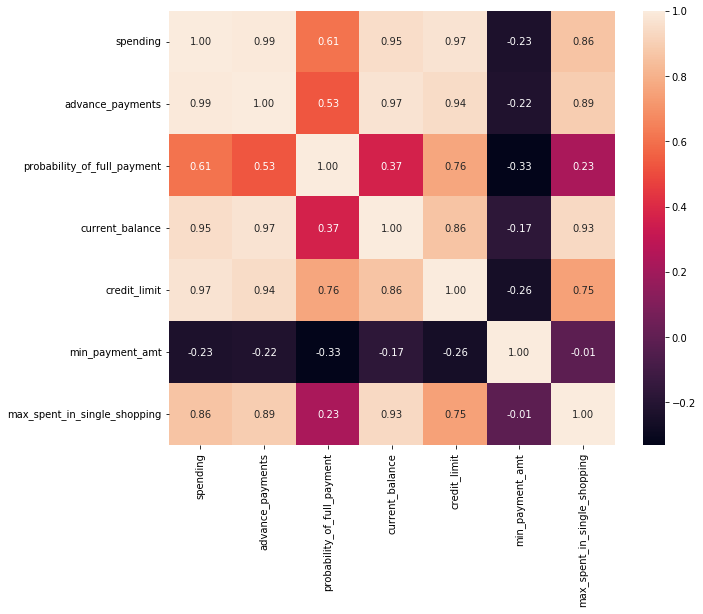

In [232]:
plt.figure(figsize=(10,8))
sns.heatmap(df_bank.corr(),annot=True,fmt=".2f")
plt.show()

Observation:
-

**Pair Plot Analysis**

In [233]:
sns.pairplot(df_bank);

Error in callback <function flush_figures at 0x0000023C704D54C8> (for post_execute):


KeyboardInterrupt: 

Positive correlation established between spending & advance_payments, credit_limit & spending, spending & current_balance and max_spent_in_single_shopping  current_balance

**Skewness**

In [ ]:
df_bank.skew().sort_values



<bound method Series.sort_values of spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64>

probability_of_full_payment variable is negetively skewed and remaining all are postively skewed.

**Outlier**

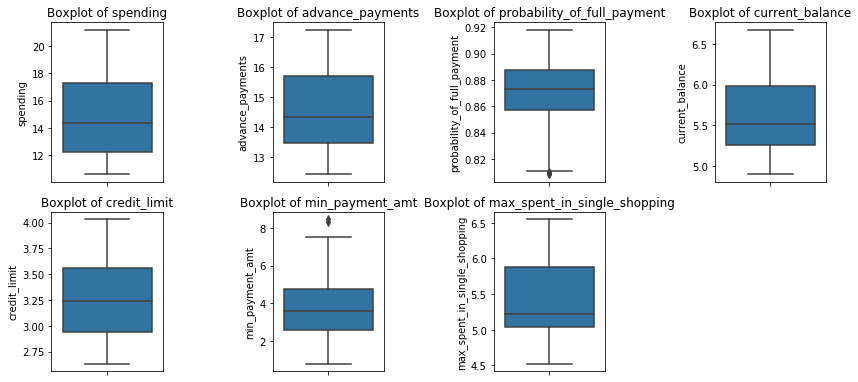

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_bank.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_bank[feature_list[i]], data = df_bank)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [ ]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_bank[i])
    df_bank[i] = np.where(df_bank[i] > UL, UL, df_bank[i])
    df_bank[i] = np.where(df_bank[i] < LL, LL, df_bank[i])

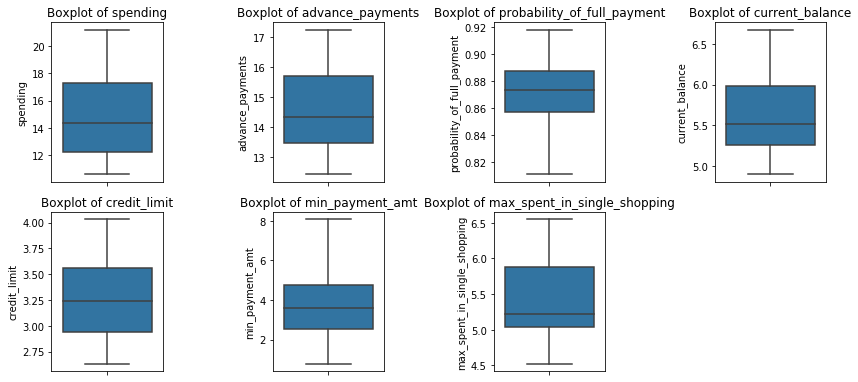

In [ ]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_bank.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_bank[feature_list[i]], data = df_bank)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

1.2  Do you think scaling is necessary for clustering in this case? Justify

The model such as works under the principle on the distance based computations needs necessary scaling. It is done for values of the variables are in different scales. In the particualar dataset spending, advance_payments are in different values and this may get more weightage. So scaling is necessary for clustering in this particular case. I have used zscore to standarised the data to relative same scale -3 to +3.

In [ ]:
from scipy.stats import zscore
df_bank_Scaled = df_bank.apply(zscore)
df_bank_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

**Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram**

In [ ]:
Ward_method = linkage(df_bank_Scaled, method = 'ward')

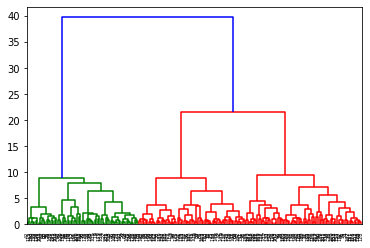

In [ ]:
dend = dendrogram(Ward_method)

**Ploting the truncated dendrogram with the last 25 clusters.**

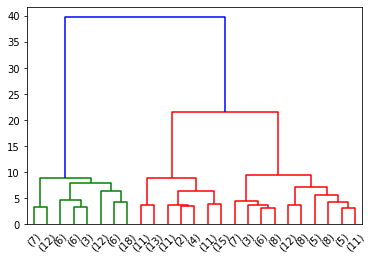

In [ ]:
dend = dendrogram(Ward_method,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

**Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.**

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
#Method 1

clusters_1 = fcluster(Ward_method, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [ ]:
# Method 2

clusters_2 = fcluster(Ward_method, 25, criterion='distance')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
np.array_equal(clusters_1,clusters_2)

False

**maxclust criterion parametered fcluster is taken for further process**

In [ ]:
df_bank['Clusters'] = clusters_1
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


Cluster Frequency

In [ ]:
df_bank.Clusters.value_counts()

3    73
1    70
2    67
Name: Clusters, dtype: int64

**Perform Hierarchical Clustering with the average linkage method and plot the dendrogram**

In [ ]:
average_method = linkage(df_bank_Scaled, method = 'average')

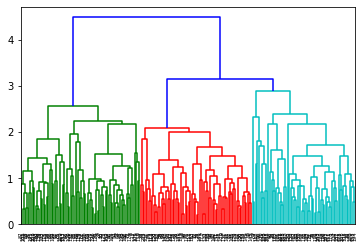

In [ ]:
dend = dendrogram(average_method)

**Plot the truncated dendrogram with the last 25 clusters.**

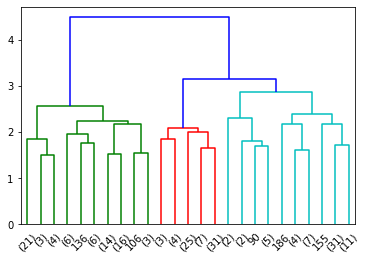

In [ ]:
dend = dendrogram(average_method,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

**Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.**

In [ ]:
clusters_12 = fcluster(average_method, 3, criterion='maxclust')
clusters_12

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [ ]:
df_bank['Clusters'] = clusters_12
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [ ]:
df_bank.Clusters.value_counts()

1    75
2    70
3    65
Name: Clusters, dtype: int64

In [ ]:
hierarchical_mean_cluster = pd.DataFrame(round(df_bank.groupby('Clusters').mean(),1))
hierarchical_mean_cluster.T

Clusters,1,2,3
spending,18.1,11.9,14.2
advance_payments,16.1,13.3,14.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.1,5.3,5.4
credit_limit,3.6,2.8,3.3
min_payment_amt,3.7,4.6,2.8
max_spent_in_single_shopping,6.0,5.1,5.1


Using Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Set n_clusters=3,affinity='euclidean', linkage='average' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df_bank_Scaled)
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [ ]:
df_bank["Agglo_CLusters"]=Cluster_agglo
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,Agglo_CLusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


Agglomerative Cluster Frequency

In [ ]:
df_bank.Agglo_CLusters.value_counts().sort_index()

0    65
1    75
2    70
Name: Agglo_CLusters, dtype: int64

In [ ]:
Agglomerative_mean_cluster = pd.DataFrame(round(df_bank.groupby('Agglo_CLusters').mean(),1))
Agglomerative_mean_cluster.T

Agglo_CLusters,0,1,2
spending,14.2,18.1,11.9
advance_payments,14.2,16.1,13.3
probability_of_full_payment,0.9,0.9,0.8
current_balance,5.4,6.1,5.3
credit_limit,3.3,3.6,2.8
min_payment_amt,2.8,3.7,4.6
max_spent_in_single_shopping,5.1,6.0,5.1
Clusters,3.0,1.0,2.0


Observation
Both Hierarchical clustering and Agglomeraive Cluster giving almost same value
Almost same mean and minor variation seen in both methods of hierarchical clustering
On the dendrogram 3 group clustering looks good. So further analysis did based on 3 group cluster solution based on the hierarchical clustering
And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_bank_Scaled)
k_means.inertia_

659.1474009548498

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_bank_Scaled)
k_means.inertia_

430.29848175122294

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_bank_Scaled)
k_means.inertia_

370.6909292210201

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_bank_Scaled)
k_means.inertia_

327.5507168609346

In [ ]:
wss = [] 

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_bank_Scaled)
    wss.append(KM.inertia_)

In [ ]:
wss

[1470.0,
 659.1474009548498,
 430.29848175122294,
 370.80362601235316,
 327.6226568785377,
 289.18901587185314,
 263.0470503293659,
 239.4992961550258,
 222.08979038658657,
 203.40401121731304]

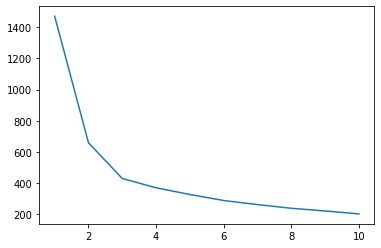

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_bank_Scaled)
labels = k_means.labels_

In [ ]:
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(df_bank_Scaled,labels)

0.40080592215222155

Silhouette score for 3 cluster is good and Elbow curve showing that after 3 cluster there is no drop in the values, so we select 3 cluster groups.

In [ ]:
pd.Series(k_means.labels_).value_counts()

1    72
0    71
2    67
dtype: int64

In [ ]:
df_bank["Clus_kmeans"] = labels
df_bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,Agglo_CLusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,2


In [ ]:
sil_width = silhouette_samples(df_bank_Scaled,labels)

In [ ]:
df_bank["sil_width"] = sil_width
df_bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,Agglo_CLusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,2,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,2,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,2,0.360972


In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(df_bank.groupby('Clus_kmeans').mean(),1))
kmeans_mean_cluster.T

Clus_kmeans,0,1,2
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
Clusters,2.7,2.1,1.0
Agglo_CLusters,0.3,1.8,1.0
sil_width,0.3,0.4,0.5


-The silhouette score seems to very less indicates all the data points are properly clustered to the clusters. 
-We consider the optimal number as 3 after there is no huge drop in inertia value of 3 clustering. It also graphically shown in Elbow Curve

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

3 group cluster via hierarchical clustering

In [ ]:
hierarchical_mean_cluster = pd.DataFrame(round(df_bank.groupby('Clusters').mean(),1))
hierarchical_mean_cluster.T

Clusters,1,2,3
spending,18.1,11.9,14.2
advance_payments,16.1,13.3,14.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.1,5.3,5.4
credit_limit,3.6,2.8,3.3
min_payment_amt,3.7,4.6,2.8
max_spent_in_single_shopping,6.0,5.1,5.1
Agglo_CLusters,1.0,2.0,0.0
Clus_kmeans,1.8,0.9,0.1
sil_width,0.4,0.4,0.4


3 group cluster via Kmeans

In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(df_bank.groupby('Clus_kmeans').mean(),1))
kmeans_mean_cluster.T

Clus_kmeans,0,1,2
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
Clusters,2.7,2.1,1.0
Agglo_CLusters,0.3,1.8,1.0
sil_width,0.3,0.4,0.5


**Cluster Group Profiles**

Promotional strategies for each cluster

Group 1 : High Spending Group

Group 2 : Medium Spending Group

Group 3 : Low Spending Group

Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df_insurance = pd.read_csv('insurance_part2_data-2.csv')

In [3]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [509]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   int8   
 8   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 108.5 KB


- One target variable - Clamied and total 9 independant variable
- Age, Commision, Duration, Sales are numeric variable
- Agency_Code, Type, Claimed, Channel, Product Name, Destination are categorial variables

In [445]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


- Commision variable more than 50% only.
- Minimum Duration is -1, and which is not possible

In [446]:
df_insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No Missig value.

In [447]:
df_insurance.duplicated().sum()

139

In [448]:
duplicates = df_insurance.duplicated()
df_insurance[duplicates]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


These duplicates are of different customers, So I am procceding the process without duplicate treatment.

Proportion of 1s and 0s

In [449]:
df_insurance.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

**Univariate Analysis**

For Numerical Value

In [450]:
df_insurance1 = df_insurance.select_dtypes(include = ['float64', 'int64'])

In [451]:
df_insurance_columns = list(df_insurance1.columns.values)

In [452]:
def univariateAnalysis(column,nbins):
    print("----------------------------------------------------------------------------")
    print("Summary of " + column)
    print(df_insurance[column].describe(),end=' ')
    
    
    print('\nmedian ------- ',df_insurance[column].median())
    print('Nullvalue ---- ',df_insurance[column].isnull().any())
    print('Skew ---------- ',df_insurance[column].skew())
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Distribution Plot of " + column)
    sns.distplot(df_insurance[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    print("Box Plot of " + column)
    ax = sns.boxplot(x=df_insurance[column])
    plt.show()

In [ ]:
#for x in df_insurance_columns:
    #univariateAnalysis(x,20)

For Categorical Value

In [453]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [454]:
df_insurance['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

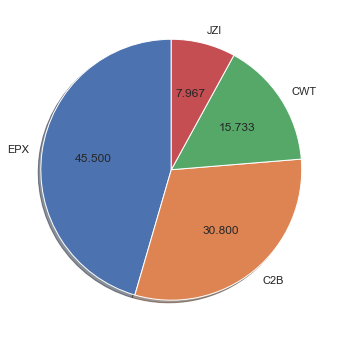

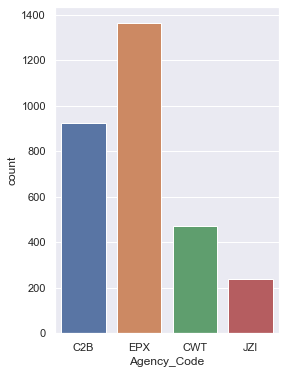

In [455]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Agency_Code'].value_counts(), startangle = 90,
        labels=['EPX','C2B', 'CWT', 'JZI'], shadow=True, autopct='%.3f');

plt.figure(figsize = (4,6))
sns.countplot(df_insurance['Agency_Code'])


In [456]:
# Type variable
df_insurance['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

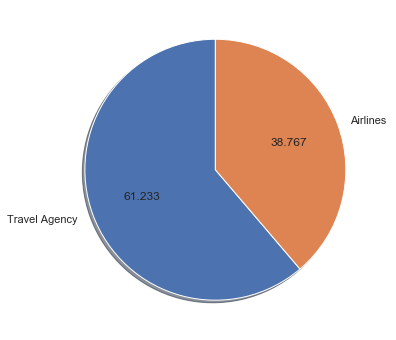

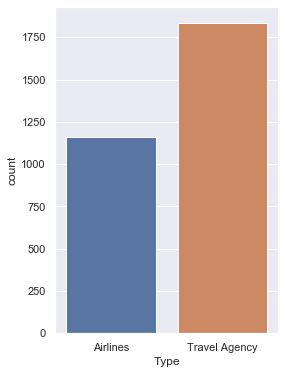

In [457]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Type'].value_counts(), startangle = 90,
        labels=['Travel Agency ','Airlines '], shadow=True, autopct='%.3f');

plt.figure(figsize = (4,6))
sns.countplot(df_insurance['Type'])


In [458]:
#Claimed variable 
df_insurance['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

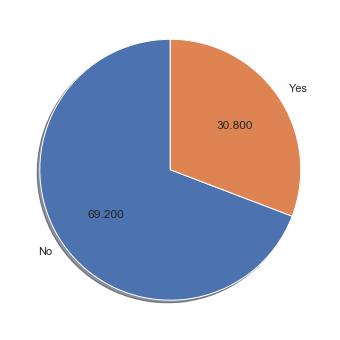

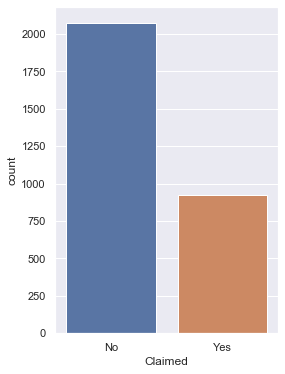

In [459]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Claimed'].value_counts(), startangle = 90,
        labels=['No','Yes'], shadow=True, autopct='%.3f');

plt.figure(figsize = (4,6))
sns.countplot(df_insurance['Claimed'])

In [460]:
#Channel
df_insurance['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

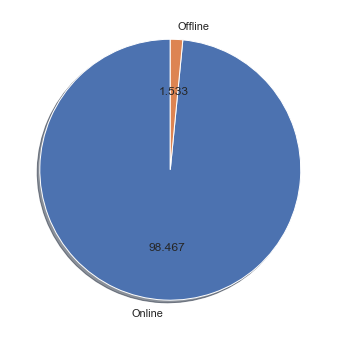

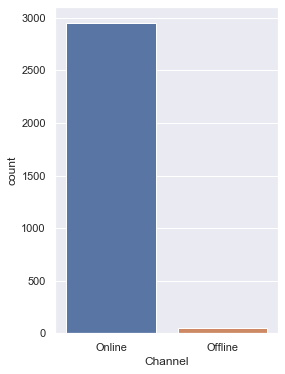

In [461]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Channel'].value_counts(), startangle = 90,
        labels=['Online','Offline'], shadow=True, autopct='%.3f');

plt.figure(figsize = (4,6))
sns.countplot(df_insurance['Channel'])

In [462]:
#Product Name
df_insurance['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

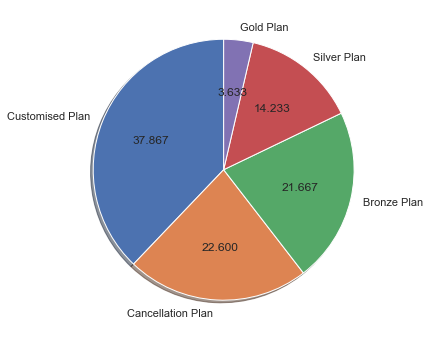

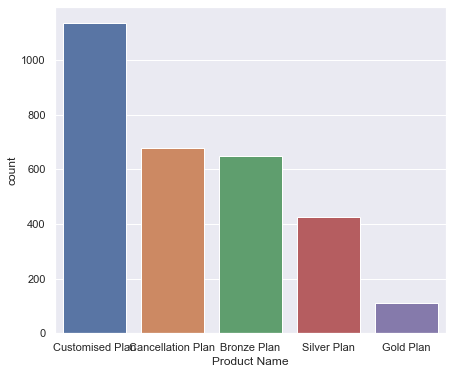

In [463]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Product Name'].value_counts(), startangle = 90,
        labels=['Customised Plan','Cancellation Plan ', 'Bronze Plan ', 'Silver Plan ', 'Gold Plan '], shadow=True, autopct='%.3f');

plt.figure(figsize = (7,6))
sns.countplot(df_insurance['Product Name'])

In [464]:
#Destination
df_insurance['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

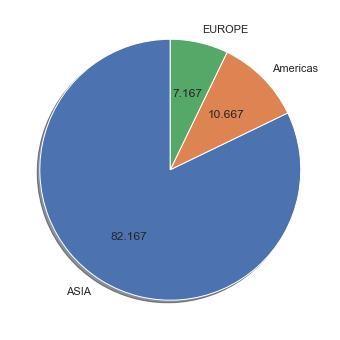

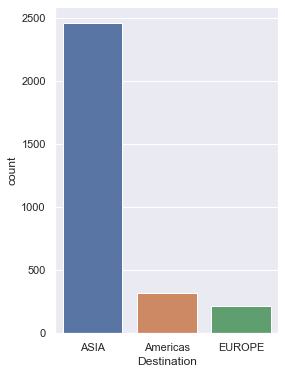

In [465]:
plt.figure(figsize = (6,6))
plt.pie(df_insurance['Destination'].value_counts(), startangle = 90,
        labels=['ASIA ','Americas', 'EUROPE'], shadow=True, autopct='%.3f');

plt.figure(figsize = (4,6))
sns.countplot(df_insurance['Destination'])

**Multivariate analysis**

Pairwise distribution of the continuous variables

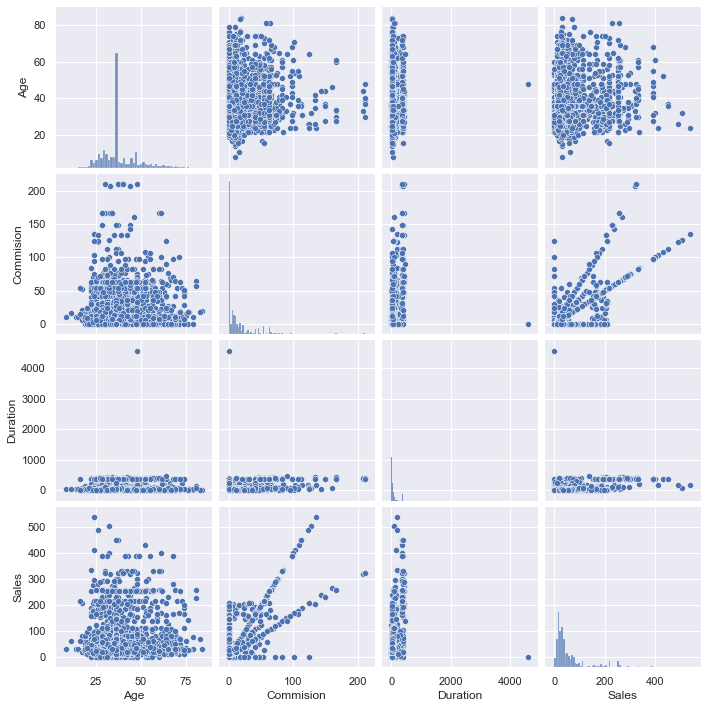

In [466]:
import seaborn as sns
sns.pairplot(df_insurance[['Age', 'Commision', 
    'Duration', 'Sales']])

Checking for Correlations using heatmap

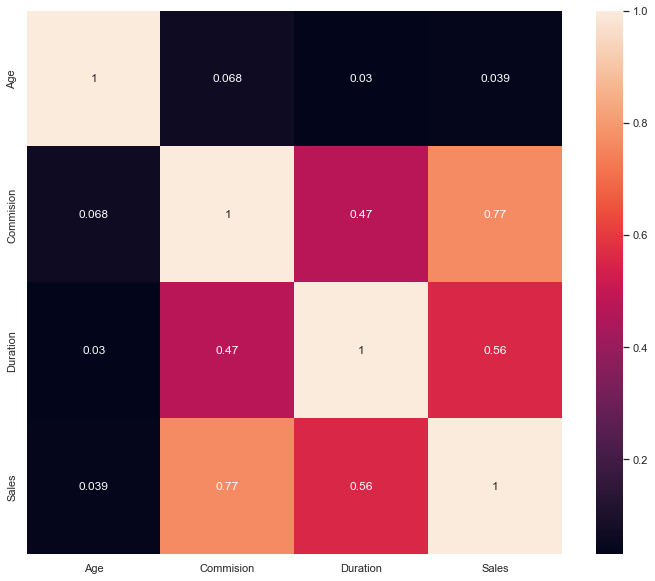

In [467]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1)
sns.heatmap(df_insurance[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

**Converting all objects to categorical codes**

In [4]:
for feature in df_insurance.columns: 
    if df_insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_insurance[feature].unique()))
        print(pd.Categorical(df_insurance[feature].unique()).codes)
        df_insurance[feature] = pd.Categorical(df_insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

Extracting the target column into separate vectors for training set and test set

In [11]:
df_insurance_dt = df_insurance.copy()

In [12]:
X_dt = df_insurance_dt.drop("Claimed", axis=1)

y_dt = df_insurance_dt.pop("Claimed")

X_dt.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [13]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_dt, y_dt, test_size=.30, random_state=1)

**Decision Tree Classifier**

In [14]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [15]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [10, 20, 40, 60],
    'min_samples_split': [100,150, 200, 250]
}

dt_model = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [17]:
grid_search_dt.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6],
                         'min

In [18]:
grid_search_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 100}

In [19]:
best_grid_dt = grid_search_dt.best_estimator_

Predicting on Training and Test dataset

In [20]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [21]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('d:\hr_tree.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

Print Feature Importances

In [22]:
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.608425
Sales         0.249026
Product Name  0.076765
Duration      0.035874
Commision     0.029910
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


** Random Forest Classifier**

In [82]:
df_insurance_rf = df_insurance.copy().copy()

In [83]:
X_rf = df_insurance_rf.drop("Claimed", axis=1)

y_rf = df_insurance_rf.pop("Claimed")


In [84]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, train_labels_rf, test_labels_rf = train_test_split(X_rf, y_rf, test_size=.30, random_state=1)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 5, 6],
    'max_features': [2,3,4, 5],
    'min_samples_leaf': [8,9,10,11,12],
    'min_samples_split': [45, 50, 55],
    'n_estimators': [300,350,400]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [86]:
grid_search_rf.fit(X_train_rf, train_labels_rf)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [87]:
grid_search_rf.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 45,
 'n_estimators': 350}

In [88]:
best_grid_rf = grid_search_rf.best_estimator_

Predicting the Training and Testing data

In [89]:
ytrain_predict_rf = best_grid_rf.predict(X_train_rf)
ytest_predict_rf = best_grid_rf.predict(X_test_rf)

Variable Importance via RF

In [90]:
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                    index = X_train_rf.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.349198
Product Name  0.206681
Sales         0.173565
Commision     0.107838
Duration      0.076472
Age           0.052592
Type          0.024748
Destination   0.008310
Channel       0.000596


**Building a Neural Network Classifier**

In [32]:
df_insurance_ann = df_insurance.copy().copy()

In [33]:
df_insurance_ann

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


In [34]:
X_ann = df_insurance_ann.drop("Claimed", axis=1)

y_ann = df_insurance_ann.pop("Claimed")

In [36]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, train_labels_ann, test_labels_ann = train_test_split(X_ann, y_ann, test_size=.30, random_state=1)

In [37]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains_ann = sc.fit_transform(X_train_ann) 
X_tests_ann = sc.transform (X_test_ann)

In [38]:
param_grid = {
    'hidden_layer_sizes': [50,100,150],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier()

grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [39]:
grid_search_ann.fit(X_trains_ann, train_labels_ann)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [40]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 150,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [41]:
best_grid_ann = grid_search_ann.best_estimator_

In [42]:
ytrain_predict_ann = best_grid_ann.predict(X_trains_ann)
ytest_predict_ann = best_grid_ann.predict(X_tests_ann)

Variable Important

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

** 1) Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for Decision Tree**

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

Accuracy

In [45]:
# train data accuracy
train_acc_dt=best_grid_dt.score(X_train,train_labels) 
train_acc_dt

0.7928571428571428

In [46]:
# test data accuracy
test_acc_dt=best_grid_dt.score(X_test,test_labels) 
test_acc_dt

0.7811111111111111

Classification Report

In [47]:
# For train data
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [48]:
dt_metrics=classification_report(train_labels, ytrain_predict_dt,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
train_f1_dt=round(df.loc["1"][2],2)
train_recall_dt=round(df.loc["1"][1],2)
train_precision_dt=round(df.loc["1"][0],2)
print ('train_f1_dt',train_f1_dt)
print ('train_recall_dt',train_recall_dt)
print ('train_precision_dt',train_precision_dt)

train_f1_dt 0.65
train_recall_dt 0.64
train_precision_dt 0.66


In [49]:
# For test data
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



In [50]:
dt_metrics_test=classification_report(test_labels, ytest_predict_dt,output_dict=True)
df_test=pd.DataFrame(dt_metrics_test).transpose()
test_f1_dt=round(df_test.loc["1"][2],2)
test_recall_dt=round(df_test.loc["1"][1],2)
test_precision_dt=round(df_test.loc["1"][0],2)
print ('test_f1_dt',test_f1_dt)
print ('test_recall_dt',test_recall_dt)
print ('test_precision_dt',test_precision_dt)

test_f1_dt 0.63
test_recall_dt 0.57
test_precision_dt 0.71


Confusion Matrix

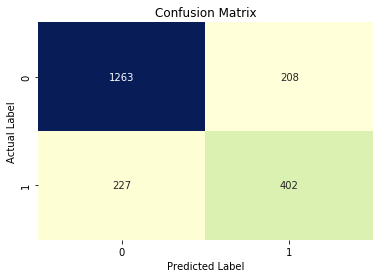

In [51]:
#For Test
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dt),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

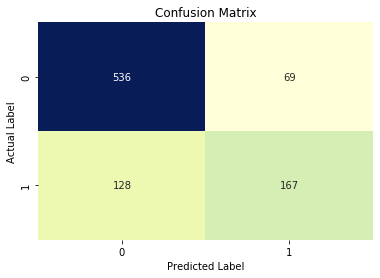

In [52]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_dt),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC and ROC

AUC: 0.830


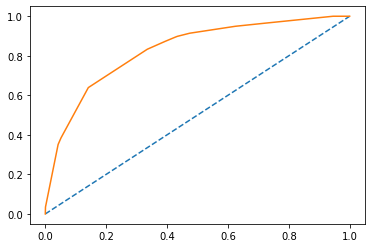

In [57]:
# predict probabilities for train data
train_probs_dt = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
train_probs_dt = train_probs_dt[:, 1]
# calculate AUC
train_auc_dt = roc_auc_score(train_labels, train_probs_dt)
print('AUC: %.3f' % train_auc_dt)
# calculate roc curve
train_fpr_dt, train_tpr_dt, trainthresholds_dt = roc_curve(train_labels, train_probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_dt, train_tpr_dt)

AUC: 0.794


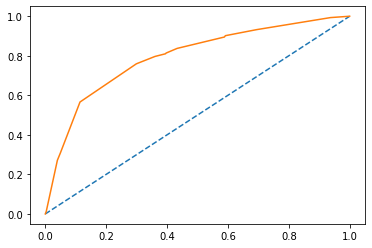

In [58]:
# predict probabilities for test data
test_probs_dt = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
test_probs_dt = test_probs_dt[:, 1]
# calculate AUC
test_auc_dt = roc_auc_score(test_labels, test_probs_dt)
print('AUC: %.3f' % test_auc_dt)
# calculate roc curve
test_fpr_dt, test_tpr_dt, testthresholds_dt = roc_curve(test_labels, test_probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_dt, test_tpr_dt)

Accuracy of Random Forest Model

In [59]:
# train data accuracy
train_acc_rf=best_grid_rf.score(X_train_rf,train_labels_rf) 
train_acc_rf

0.81

In [60]:
# test data accuracy
test_acc_rf=best_grid_rf.score(X_test_rf,test_labels_rf) 
test_acc_rf

0.7722222222222223

Classification Report for Random Forest

In [61]:
# For train data
print(classification_report(train_labels_rf,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [62]:
rf_metrics=classification_report(train_labels_rf, ytrain_predict_rf,output_dict=True)
df_rf=pd.DataFrame(rf_metrics).transpose()
train_f1_rf=round(df_rf.loc["1"][2],2)
train_recall_rf=round(df_rf.loc["1"][1],2)
train_precision_rf=round(df_rf.loc["1"][0],2)
print ('train_f1_rf',train_f1_rf)
print ('train_recall_rf',train_recall_rf)
print ('train_precision_rf',train_precision_rf)

train_f1_rf 0.65
train_recall_rf 0.59
train_precision_rf 0.72


In [63]:
# For test data
print(classification_report(test_labels_rf,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [64]:
rf_metrics_test=classification_report(test_labels_rf, ytest_predict_rf,output_dict=True)
df_rf_test=pd.DataFrame(rf_metrics_test).transpose()
test_f1_rf=round(df_rf_test.loc["1"][2],2)
test_recall_rf=round(df_rf_test.loc["1"][1],2)
test_precision_rf=round(df_rf_test.loc["1"][0],2)
print ('test_f1_rf',test_f1_rf)
print ('test_recall_rf',test_recall_rf)
print ('test_precision_rf',test_precision_rf)

test_f1_rf 0.58
test_recall_rf 0.48
test_precision_rf 0.73


Confusion Matrix for Random Forest

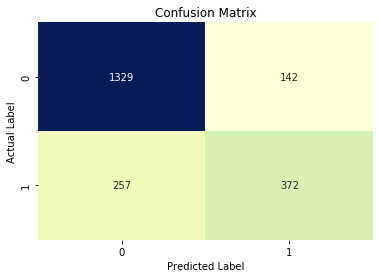

In [65]:
#For Test
sns.heatmap(confusion_matrix(train_labels_rf, ytrain_predict_rf),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

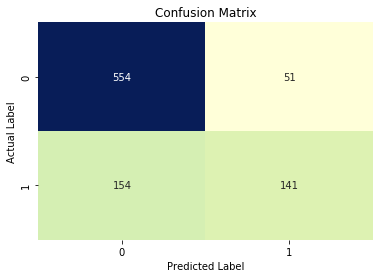

In [66]:
sns.heatmap(confusion_matrix(test_labels_rf, ytest_predict_rf),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC and ROC for Random Forest

AUC: 0.856


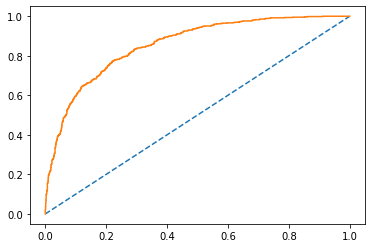

In [67]:
# predict probabilities for train data
train_probs_rf = best_grid_rf.predict_proba(X_train_rf)
# keep probabilities for the positive outcome only
train_probs_rf = train_probs_rf[:, 1]
# calculate AUC
train_auc_rf = roc_auc_score(train_labels_rf, train_probs_rf)
print('AUC: %.3f' % train_auc_rf)
# calculate roc curve
train_fpr_rf, train_tpr_rf, trainthresholds_rf = roc_curve(train_labels_rf, train_probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_rf, train_tpr_rf)

AUC: 0.821


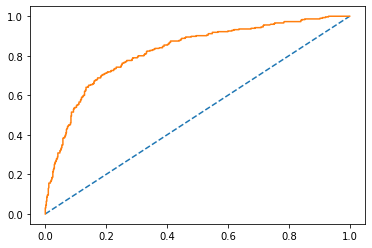

In [68]:
# predict probabilities for test data
test_probs_rf = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
test_probs_rf = test_probs_rf[:, 1]
# calculate AUC
test_auc_rf = roc_auc_score(test_labels_rf, test_probs_rf)
print('AUC: %.3f' % test_auc_rf)
# calculate roc curve
test_fpr_rf, test_tpr_rf, testthresholds_rf = roc_curve(test_labels_rf, test_probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_rf, test_tpr_rf)

Accuracy for Artificial Neural Network

In [69]:
# train data accuracy
train_acc_ann=best_grid_dt.score(X_train_ann,train_labels_ann) 
train_acc_ann

0.7928571428571428

In [70]:
# test data accuracy
test_acc_ann=best_grid_ann.score(X_test_ann,test_labels_ann) 
test_acc_ann

0.5244444444444445

Classification Report for Artificial Neural Network

In [71]:
# For train data
print(classification_report(train_labels_ann,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.49      0.57       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [72]:
ann_metrics=classification_report(train_labels_ann, ytrain_predict_ann,output_dict=True)
df_ann=pd.DataFrame(ann_metrics).transpose()
train_f1_ann=round(df_ann.loc["1"][2],2)
train_recall_ann=round(df_ann.loc["1"][1],2)
train_precision_ann=round(df_ann.loc["1"][0],2)
print ('train_f1_ann',train_f1_ann)
print ('train_recall_ann',train_recall_ann)
print ('train_precision_ann',train_precision_ann)

train_f1_ann 0.57
train_recall_ann 0.49
train_precision_ann 0.69


In [73]:
# For test data
print(classification_report(test_labels_ann,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.72      0.39      0.51       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.73       900



In [74]:
ann_metrics_test=classification_report(test_labels_ann, ytest_predict_ann,output_dict=True)
df_ann_test=pd.DataFrame(ann_metrics_test).transpose()
test_f1_ann=round(df_ann_test.loc["1"][2],2)
test_recall_ann=round(df_ann_test.loc["1"][1],2)
test_precision_ann=round(df_ann_test.loc["1"][0],2)
print ('test_f1_ann',test_f1_ann)
print ('test_recall_ann',test_recall_ann)
print ('test_precision_ann',test_precision_ann)

test_f1_ann 0.51
test_recall_ann 0.39
test_precision_ann 0.72


Confusion Matrix for Artificial Neural Network

#For Test
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dt),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

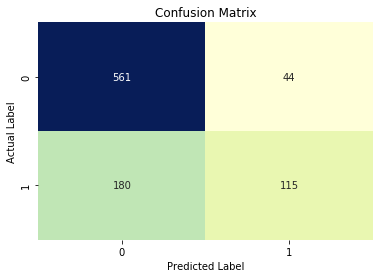

In [75]:
sns.heatmap(confusion_matrix(test_labels_ann, ytest_predict_ann),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC and ROC for Artificial Neural Network

AUC: 0.713


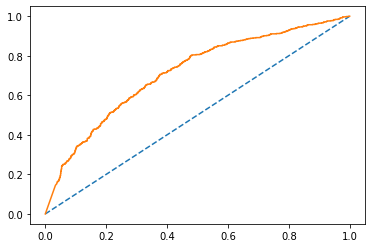

In [76]:
# predict probabilities for train data
train_probs_ann = best_grid_ann.predict_proba(X_train_ann)
# keep probabilities for the positive outcome only
train_probs_ann = train_probs_ann[:, 1]
# calculate AUC
train_auc_ann = roc_auc_score(train_labels_ann, train_probs_ann)
print('AUC: %.3f' % train_auc_ann)
# calculate roc curve
train_fpr_ann, train_tpr_ann, trainthresholds_ann = roc_curve(train_labels_ann, train_probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ann, train_tpr_ann)

AUC: 0.794


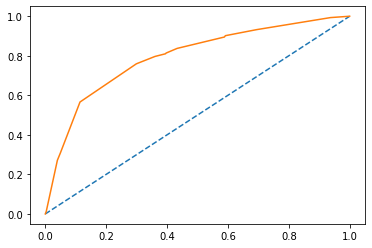

In [77]:
# predict probabilities for test data
test_probs_ann = best_grid_dt.predict_proba(X_test_ann)
# keep probabilities for the positive outcome only
test_probs_ann = test_probs_ann[:, 1]
# calculate AUC
test_auc_ann = roc_auc_score(test_labels_ann, test_probs_ann)
print('AUC: %.3f' % test_auc_ann)
# calculate roc curve
test_fpr_ann, test_tpr_ann, testthresholds_ann = roc_curve(test_labels_ann, test_probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ann, test_tpr_ann)

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [92]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[train_acc_dt,train_auc_dt,train_recall_dt,train_precision_dt,train_f1_dt],
        'Decision Tree Test':[test_acc_dt,test_auc_dt,test_recall_dt,test_precision_dt,test_f1_dt],
       'Random Forest Train':[train_acc_rf,train_auc_rf,train_recall_rf,train_precision_rf,train_f1_rf],
        'Random Forest Test':[test_acc_rf,test_auc_rf,test_recall_rf,test_precision_rf,test_f1_rf],
       'Neural Network Train':[train_acc_ann,train_auc_ann,train_recall_ann,train_precision_ann,train_f1_ann],
        'Neural Network Test':[test_acc_ann,test_auc_ann,test_recall_ann,test_precision_ann,test_f1_ann]},index=index)
round(data,2)

,Decision Tree Train,Decision Tree Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.78,0.81,0.77,0.79,0.52
AUC,0.83,0.79,0.86,0.82,0.71,0.79
Recall,0.64,0.57,0.59,0.48,0.49,0.39
Precision,0.66,0.71,0.72,0.73,0.69,0.72
F1 Score,0.65,0.63,0.65,0.58,0.57,0.51


ROC Curve for the 3 models on the Training data

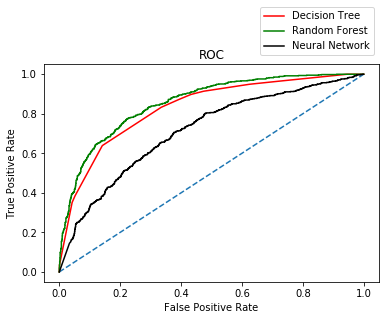

In [79]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_dt, train_tpr_dt,color='red',label="Decision Tree")
plt.plot(train_fpr_rf,train_tpr_rf,color='green',label="Random Forest")
plt.plot(train_fpr_ann,train_tpr_ann,color='black',label="Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

ROC Curve for the 3 models on the Test data

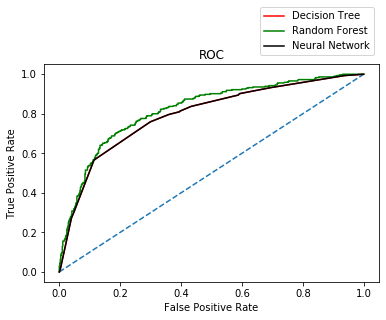

In [80]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_dt, test_tpr_dt,color='red',label="Decision Tree")
plt.plot(test_fpr_rf,test_tpr_rf,color='green',label="Random Forest")
plt.plot(test_fpr_ann,test_tpr_ann,color='black',label="Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations